In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
geodata= '../../model/model_versions/v_7/v7_1/hds_model/GeoData.txt'

stmary_seg= '../../geospacial/misc/stm_upstream_seg.txt'

milk_seg= '../../geospacial/misc/milk_upstream_seg.txt'

In [3]:
# read and format geodata
geodata= pd.read_csv(geodata, index_col=0, sep='\t') 

# Set index to int
geodata.index = geodata.index.astype(int)

In [4]:
# read st mary seg
with open(stmary_seg, 'r') as file:
    stm_seg= [int(line.strip()) for line in file]

# read st mary seg
with open(milk_seg, 'r') as file:
    milk_seg= [int(line.strip()) for line in file]

In [5]:
slc_columns= [col for col in geodata.columns if col.startswith('SLC_')]

In [6]:
geodata[slc_columns]= geodata[slc_columns].multiply(geodata['area'], axis=0)

In [7]:
# subset into stm and milk dataframes
stm= geodata[geodata.index.isin(stm_seg)].copy()
milk= geodata[geodata.index.isin(milk_seg)].copy()

In [8]:
# find total area of each region
stm_area= stm['area'].sum()
milk_area= milk['area'].sum()

# change area to percent area
stm[slc_columns]= (stm[slc_columns] / stm_area) * 100
milk[slc_columns]= (milk[slc_columns] / milk_area) * 100

In [9]:
# Sum SLC areas
stm_sums= stm[slc_columns].sum()
milk_sums= milk[slc_columns].sum()

In [10]:
stm_sums_sorted= stm_sums.sort_values(ascending= False)
milk_sums_sorted= milk_sums.sort_values(ascending= False)

In [11]:
# remove slc columns with 0
stm_sums_filtered= stm_sums[stm_sums != 0]
milk_sums_filtered= milk_sums[milk_sums != 0]

AttributeError: module 'matplotlib.pyplot' has no attribute 'save_fig'

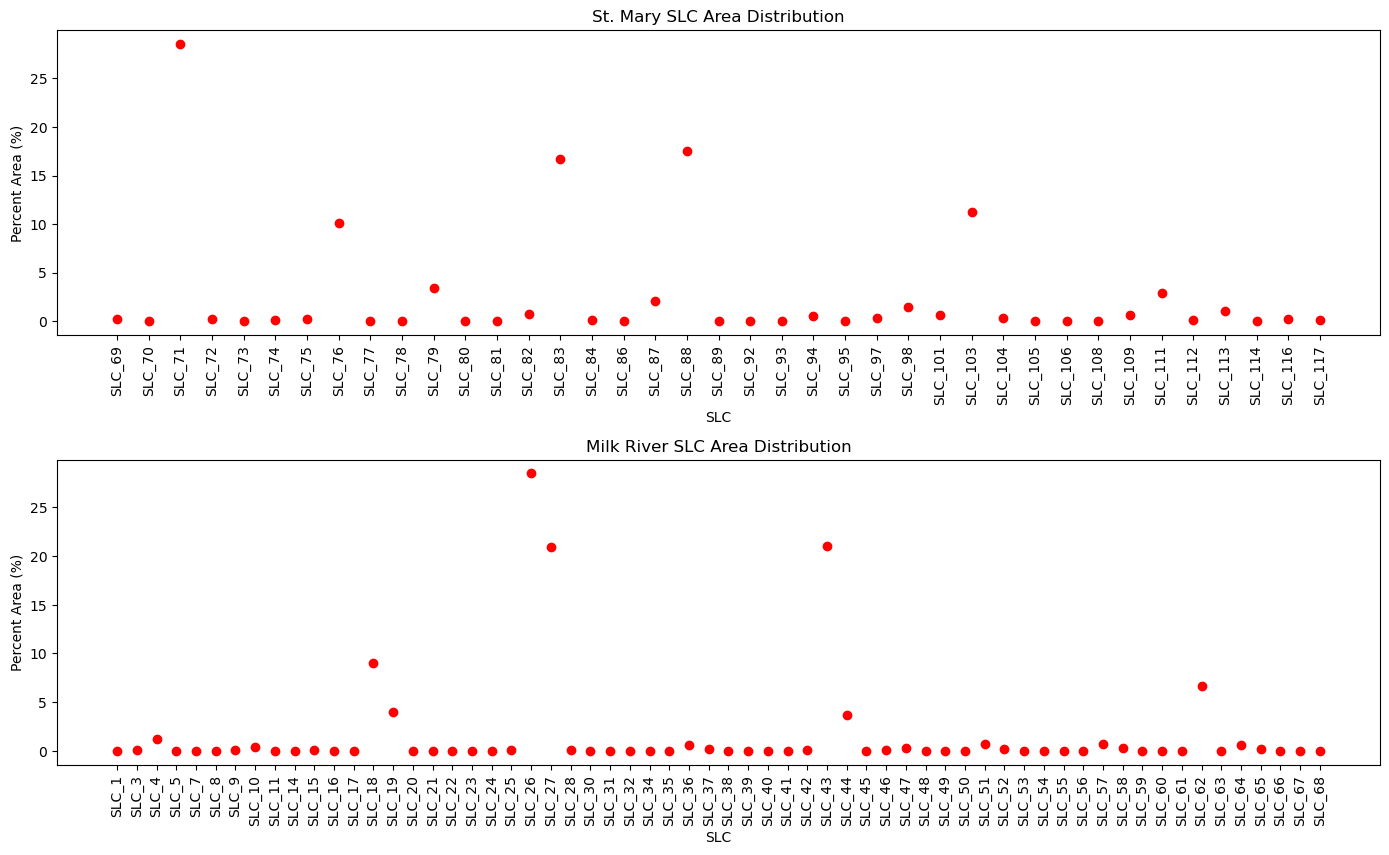

In [12]:
fig, axs= plt.subplots(2, 1, figsize=(14,8.653))

axs[0].scatter(stm_sums_filtered.index, stm_sums_filtered.values, color= 'red')
axs[0].set_title('St. Mary SLC Area Distribution')
axs[0].set_xlabel('SLC')
axs[0].set_ylabel('Percent Area (%)')
axs[0].tick_params(axis= 'x', rotation=90)

axs[1].scatter(milk_sums_filtered.index, milk_sums_filtered.values, color= 'red')
axs[1].set_title('Milk River SLC Area Distribution')
axs[1].set_xlabel('SLC')
axs[1].set_ylabel('Percent Area (%)')
axs[1].tick_params(axis= 'x', rotation=90)

plt.tight_layout()

plt.save_fig('../../model/model_versions/v_7/v7_1/hds_model/dominant_slc.png')
plt.show()

In [ ]:
stm_sums_sorted

In [ ]:
milk_sums_sorted